In [1]:
%matplotlib inline
import time


Training a classifier
=====================

This is it. You have seen how to define neural networks, compute loss and make
updates to the weights of the network.

Now you might be thinking,

What about data?
----------------

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.  
一般地， 当你需要处理图像， 文本， 语音或者视频数据的时候， 你可以使用标准的pyhon包加载数据为numpy数组。 然后你可以把这个数组转换成一个 ``torch.*Tensor``

-  For images, packages such as Pillow, OpenCV are useful.  
   对于图像，使用 Pillow， OpenCV
-  For audio, packages such as scipy and librosa  
   对于语音， 使用 scipy, librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful.  
   对于文本， 使用原始的 Python 或者 Cython 加载数据， 或者 NLTK 和 SpaCy 都是很好使的

Specifically for ``vision``, we have created a package called
``torchvision``, that has data loaders for common datasets such as
Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.  
特别地对于视觉模块， 我们创建了一个名为 ``torchvision`` 的包， 这个包有对于一般数据集如Imagenet、 CIFAR10、 MNIST等的加载模块， 还有对于图像的数据处理模块 ``torchvision.datasets`` 和 ``torch.utils.data.DataLoader``。

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.  
对于这个入门手册， 我们将使用CIFAR10数据集。 它有如下类别的图像： 飞机、 汽车、 鸟、 猫、 鹿、 狗、 青蛙、 马、 船、 卡车。 CIFAR10 的图像大小都是3×32×32。

.. figure:: /_static/img/cifar10.png
   :alt: cifar10

   cifar10


Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``  
   加载并正则化CIFAR10训练集和测试集， 使用 ``torchvision`` 包
2. Define a Convolution Neural Network  
   定义一个卷积神经网络
3. Define a loss function  
   定义一个损失函数
4. Train the network on the training data  
   在训练集上训练这个神经网络
5. Test the network on the test data  
   在网络上使用测试集测试

1. Loading and normalizing CIFAR10
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Using ``torchvision``, it’s extremely easy to load CIFAR10.



In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1]  
torchvision 的输出数据集是 PILImage 图像， 它们的像素取值范围是[0, 1]。 我们将它们转换成 normalized 的范围为 [-1, 1] 的 Tensor。



In [89]:
#数据normalize
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#貌似这个能直接下载数据集
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
#划分训练集
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
#划分测试集
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=2)
#定义类别
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.



 deer  deer   car  frog horse  bird   dog truck


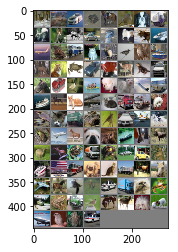

Process Process-149:
Process Process-150:
Traceback (most recent call last):
  File "/home/lin/anaconda3/envs/snakes/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/lin/anaconda3/envs/snakes/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/lin/anaconda3/envs/snakes/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
  File "/home/lin/anaconda3/envs/snakes/lib/python3.5/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/lin/anaconda3/envs/snakes/lib/python3.5/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
Traceback (most recent call last):
  File "/home/lin/anaconda3/envs/snakes/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/lin/anaconda3/envs/snakes/lib/python3.5/multipro

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))

2. Define a Convolution Neural Network  

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^  
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).  
复制上一个NN单元的神经网络， 并把它的图像输入通道改成三通道。



In [103]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 5, padding = 2) #after this, 32*32*32
        self.pool1 = nn.MaxPool2d(3, 2) #after this, 32*15*15
        self.conv2 = nn.Conv2d(32, 64, 5, padding = 2) #after this, 64*15*15
        self.pool2 = nn.AvgPool2d(3, 2) #after this, 64*7*7
        self.conv3 = nn.Conv2d(64, 64, 5, padding = 2) #after this, 64*7*7
        self.pool3 = nn.AvgPool2d(3, 2) #after this, 64*3*3
        self.fc1 = nn.Linear(64*3*3, 128)
        self.fc2 = nn.Linear(128, 10)
        #self.fc3 = nn.Softmax()

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 3 * 3) #把二维的转换成一维的
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        #x = self.fc3(x)
        return x

net = Net()

3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum  
定义损失函数和优化器  
使用交叉熵损失函数和使用momentum的SGD



In [115]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

4. Train the network
^^^^^^^^^^^^^^^^^^^^

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize



In [116]:
net = net.cuda()

In [118]:
time_start = time.time()
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0): #枚举trainloader里面的样本
        # get the inputs 获得输入
        inputs, labels = data

        # wrap them in Variable 转换成Variable
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

        # zero the parameter gradients 梯度置零初始化
        optimizer.zero_grad()

        # forward + backward + optimize 前向计算， 反向传播， 优化器
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics  打印中间信息
        running_loss += loss.data[0]
        if i % 100 == 99:
            print('[%d, %5d] loss: %.5f' %(epoch + 1, i + 1, running_loss/200))
            running_loss = 0.0
time_end = time.time()
print('Finished Training, using ' + str((time_end - time_start)) + 's')

[1,   100] loss: 0.28157
[1,   200] loss: 0.28476
[1,   300] loss: 0.28421
[1,   400] loss: 0.28250
[1,   500] loss: 0.28500
[2,   100] loss: 0.27815
[2,   200] loss: 0.28455
[2,   300] loss: 0.28324
[2,   400] loss: 0.28802
[2,   500] loss: 0.28185
[3,   100] loss: 0.27520
[3,   200] loss: 0.27855
[3,   300] loss: 0.28245
[3,   400] loss: 0.28595
[3,   500] loss: 0.28800
[4,   100] loss: 0.27576
[4,   200] loss: 0.28498
[4,   300] loss: 0.28222
[4,   400] loss: 0.28337
[4,   500] loss: 0.28571
[5,   100] loss: 0.27488
[5,   200] loss: 0.27297
[5,   300] loss: 0.28064
[5,   400] loss: 0.28796
[5,   500] loss: 0.27666
[6,   100] loss: 0.27925
[6,   200] loss: 0.28293
[6,   300] loss: 0.27724
[6,   400] loss: 0.27519
[6,   500] loss: 0.26987
[7,   100] loss: 0.26671
[7,   200] loss: 0.27938
[7,   300] loss: 0.27458
[7,   400] loss: 0.27215
[7,   500] loss: 0.27928
[8,   100] loss: 0.26540
[8,   200] loss: 0.27134
[8,   300] loss: 0.28265
[8,   400] loss: 0.27953
[8,   500] loss: 0.27145


[64,   300] loss: 0.19621
[64,   400] loss: 0.19343
[64,   500] loss: 0.19609
[65,   100] loss: 0.19332
[65,   200] loss: 0.19378
[65,   300] loss: 0.18871
[65,   400] loss: 0.19047
[65,   500] loss: 0.19434
[66,   100] loss: 0.18908
[66,   200] loss: 0.18645
[66,   300] loss: 0.18914
[66,   400] loss: 0.19763
[66,   500] loss: 0.19099
[67,   100] loss: 0.18525
[67,   200] loss: 0.18513
[67,   300] loss: 0.18575
[67,   400] loss: 0.20025
[67,   500] loss: 0.18628
[68,   100] loss: 0.18909
[68,   200] loss: 0.18219
[68,   300] loss: 0.18895
[68,   400] loss: 0.18978
[68,   500] loss: 0.19144
[69,   100] loss: 0.18071
[69,   200] loss: 0.19115
[69,   300] loss: 0.18696
[69,   400] loss: 0.18954
[69,   500] loss: 0.19002
[70,   100] loss: 0.18302
[70,   200] loss: 0.18310
[70,   300] loss: 0.18127
[70,   400] loss: 0.18580
[70,   500] loss: 0.19240
[71,   100] loss: 0.18409
[71,   200] loss: 0.18036
[71,   300] loss: 0.18367
[71,   400] loss: 0.18389
[71,   500] loss: 0.18673
[72,   100] 

5. Test the network on the test data
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



GroundTruth:    cat  ship  ship plane


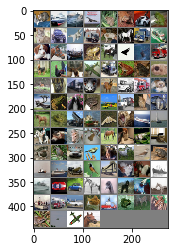

In [119]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [120]:
outputs = net(Variable(images.cuda()))

The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [121]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [122]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images.cuda()))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels.cuda()).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 77 %


That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [123]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images.cuda()))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels.cuda()).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 90 %
Accuracy of   car : 90 %
Accuracy of  bird : 63 %
Accuracy of   cat : 51 %
Accuracy of  deer : 83 %
Accuracy of   dog : 75 %
Accuracy of  frog : 94 %
Accuracy of horse : 84 %
Accuracy of  ship : 91 %
Accuracy of truck : 79 %


Okay, so what next?

How do we run these neural networks on the GPU?  
我们如何才能把这些神经网络加载到GPU上面跑？

Training on GPU
----------------
Just like how you transfer a Tensor on to the GPU, you transfer the neural
net onto the GPU.  
像把Tensor加载到GPU一样， 你也可以把整个神经网络加载到GPU上。
This will recursively go over all modules and convert their parameters and
buffers to CUDA tensors:  
这将会递归地将所有模块的参数和缓存转换成CUDA Tensors， 即GPU上的张量。

.. code:: python

    net.cuda()


Remember that you will have to send the inputs and targets at every step
to the GPU too:  
不要忘了每一次都要将输入和标签也都加载到GPU上：

::

        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

Why dont I notice MASSIVE speedup compared to CPU? Because your network
is realllly small.  
为什么我没发现巨大的速度提升？ 因为你的网络实在太小了！

**Exercise:** Try increasing the width of your network (argument 2 of
the first ``nn.Conv2d``, and argument 1 of the second ``nn.Conv2d`` –
they need to be the same number), see what kind of speedup you get.  
**练习:** 尝试将你的网络网络宽度加宽

**Goals achieved**:

- Understanding PyTorch's Tensor library and neural networks at a high level.
- Train a small neural network to classify images

Where do I go next?
-------------------

-  :doc:`Train neural nets to play video games </intermediate/reinforcement_q_learning>`
-  `Train a state-of-the-art ResNet network on imagenet`_
-  `Train an face generator using Generative Adversarial Networks`_
-  `Train a word-level language model using Recurrent LSTM networks`_
-  `More examples`_
-  `More tutorials`_
-  `Discuss PyTorch on the Forums`_
-  `Chat with other users on Slack`_




In [5]:
import numpy

In [6]:
import torch
x=torch.Tensor(5,5)
y=torch.rand(5,5)
a=torch.ones(5,5)
b=a.numpy()
a.add_(1)
print(a,b)


 2  2  2  2  2
 2  2  2  2  2
 2  2  2  2  2
 2  2  2  2  2
 2  2  2  2  2
[torch.FloatTensor of size 5x5]
 [[ 2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.]]


In [7]:
runfile('C:/Users/QC/.spyder-py3/temp.py', wdir='C:/Users/QC/.spyder-py3')

NameError: name 'runfile' is not defined